In [1]:
import numpy as np
import torch

import sys; sys.path.append('../..')
from models.adaptive_temperature_softmax import AdaptiveTemperatureSoftmax
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [2]:
adaptive_temp_softmax = AdaptiveTemperatureSoftmax(adaptive_training_temperature=False)

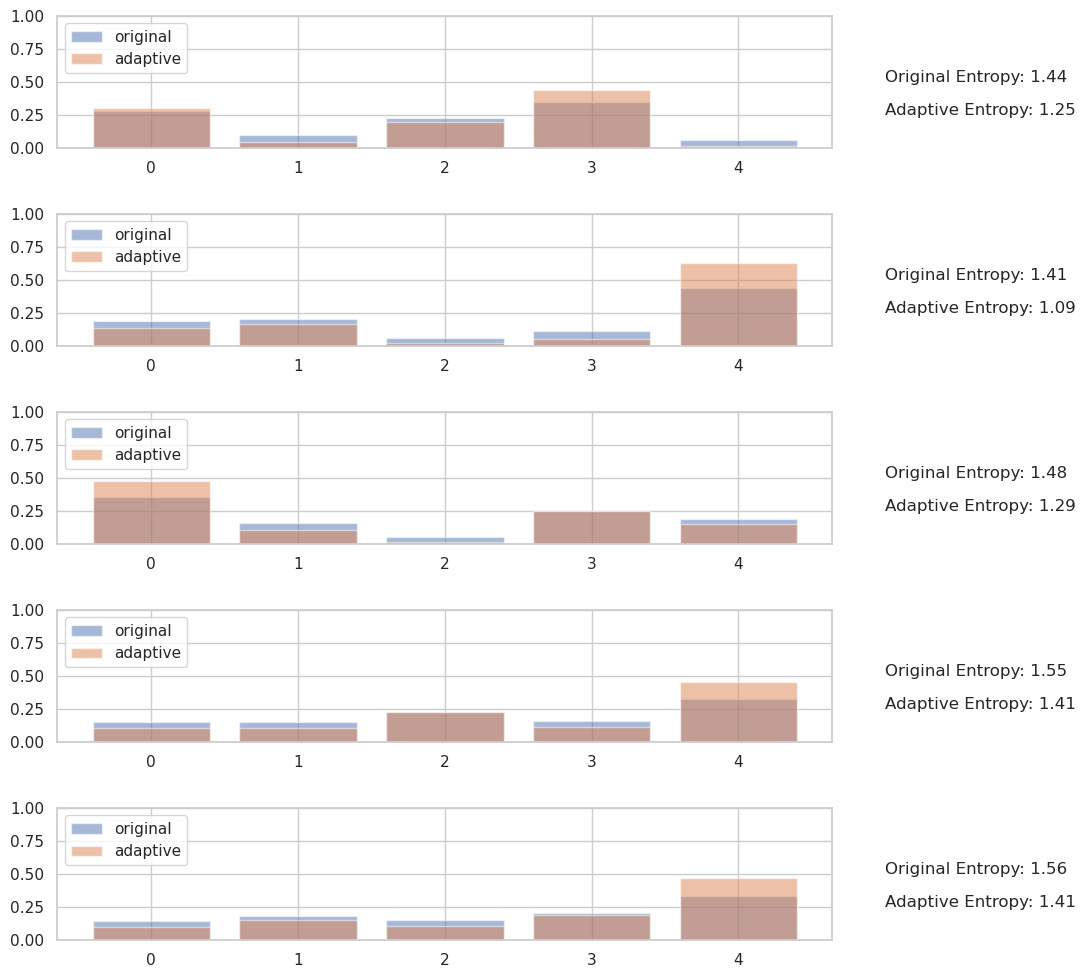

In [3]:
# generate 5 random logits, and check the sharpening effect of adaptive temperature scaling
trials = 5
fig, axs = plt.subplots(trials, 1, figsize=(10, 12), )
plt.subplots_adjust(hspace=0.5)
n_classes = 5

adaptive_temp_softmax.eval() # set to eval mode to enable adaptive temperature scaling
for i in range(trials):
    logits = torch.randn(1, n_classes)
    probs = torch.nn.functional.softmax(logits, dim=-1)
    adaptive_probs = adaptive_temp_softmax(logits)

    axs[i].bar(range(n_classes), probs[0].detach().numpy(), alpha=0.5, label='original')
    axs[i].bar(range(n_classes), adaptive_probs[0].detach().numpy(), alpha=0.5, label='adaptive')

    # add annotation of enotrpy of the distribution
    entropy = -torch.sum(probs * torch.log(probs), dim=-1)
    adaptive_entropy = -torch.sum(adaptive_probs * torch.log(adaptive_probs), dim=-1)
    axs[i].text(n_classes, 0.5, f'Original Entropy: {entropy.item():.2f}', fontsize=12)
    axs[i].text(n_classes, 0.25, f'Adaptive Entropy: {adaptive_entropy.item():.2f}', fontsize=12)

    axs[i].legend(loc='upper left')
    axs[i].set_ylim(0, 1)